#The data
The website http://tennis-data.co.uk/alldata.php gathers outcomes of both WTA (Women Tennis Association) and ATP (Association of Tennis Professionals - men only) tennis games over several years.

A short description of each variable can be found here :
http://www.tennis-data.co.uk/notes.txt

# Installation

In [1]:
!pip install --upgrade xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 245.8 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 479.1 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 504.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/250.9 kB 245.8 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 599.1 kB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

# Helpers

In [1]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset
Executing the cell below should provide you with :
- one pandas dataframe for all ATP matches ( df_atp )
- one pandas dataframe for all WTA matches ( df_wta )

In [26]:
BASE_URL = "http://tennis-data.co.uk"
LOCAL_DIRECTORY ="tennis_data"

ATP_DIR = f"./{LOCAL_DIRECTORY}/ATP"
WTA_DIR = f"./{LOCAL_DIRECTORY}/WTA"

ATP_URLS = [f"{BASE_URL}/{i}/{i}.zip" for i in range(2000,2019)]
WTA_URLS = [f"{BASE_URL}/{i}w/{i}.zip" for i in range(2007,2019)]

os.makedirs(os.path.join(ATP_DIR,"archives"),exist_ok=True)
os.makedirs(os.path.join(WTA_DIR,"archives"),exist_ok=True)

for urls,dir in ((ATP_URLS,ATP_DIR),(WTA_URLS,WTA_DIR)):
    for url in urls:
        logging.info("downloading & extracting file %s", url)
        path = os.path.join(dir,"archives",osp.basename(url))
        download_file(url,path)
        extract_file(path,dir)

ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

In [ ]:
df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

df_atp.to_csv("df_atp.csv",sep=";")
df_wta.to_csv("df_wta.csv",sep=";")

# logging.info("%i matches ATP in df_atp", df_atp.shape[0])
# logging.info("%i matches WTA in df_wta", df_wta.shape[0])

In [72]:
df_atp.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

# calculation of rolling statistics
Calculating rolling statistics across matches

In [18]:
df_atp = pd.read_csv("df_atp.csv",sep=";",index_col="Unnamed: 0")

df_atp = df_atp.sort_values("Date").reset_index(drop=True)

C:\Users\Matthieu\AppData\Local\Temp\ipykernel_1688\2605141990.py:1: DtypeWarning: Columns (12,13,16,17,18,19,25,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_atp = pd.read_csv("df_atp.csv",sep=";",index_col="Unnamed: 0")


In [19]:
df_atp["Winner_Win_percentage"] = 0
df_atp["Loser_Win_percentage"] = 0

player_dict={}

for index,row in df_atp.iterrows():

    winner = row.Winner
    loser = row.Loser
    
    if winner not in player_dict:
        player_dict[winner] = {"matches": 0, "wins": 0}
    
    if loser not in player_dict:
        player_dict[loser] = {"matches": 0, "wins": 0}


    if player_dict[winner]["matches"] > 0:
        winner_win_percentage = (player_dict[winner]["wins"] / player_dict[winner]["matches"])*100
        df_atp.at[index,"Winner_Win_percentage"] = winner_win_percentage

    if player_dict[loser]["matches"] > 0:
        loser_win_percentage = (player_dict[loser]["wins"] / player_dict[loser]["matches"])*100
        df_atp.at[index,"Loser_Win_percentage"] = loser_win_percentage

    player_dict[winner]["matches"]+=1
    player_dict[winner]["wins"]+=1
    player_dict[loser]["matches"]+=1
   

display(df_atp[['Date', 'Winner', 'Loser', 'Winner_Win_percentage',"Loser_Win_percentage"]].tail(5))

C:\Users\Matthieu\AppData\Local\Temp\ipykernel_1688\939477479.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.66666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_atp.at[index,"Winner_Win_percentage"] = winner_win_percentage
C:\Users\Matthieu\AppData\Local\Temp\ipykernel_1688\939477479.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.66666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_atp.at[index,"Loser_Win_percentage"] = loser_win_percentage


,Date,Winner,Loser,Winner_Win_percentage,Loser_Win_percentage
52293,2018-11-16,Zverev A.,Isner J.,66.403162,62.270451
52294,2018-11-16,Djokovic N.,Cilic M.,82.987552,65.204678
52295,2018-11-17,Djokovic N.,Anderson K.,83.005181,58.979206
52296,2018-11-17,Zverev A.,Federer R.,66.535433,82.914201
52297,2018-11-18,Zverev A.,Djokovic N.,66.666667,83.022774


In [20]:
import numpy as np
def enrich_with_temporal_features(df):
    df = df.sort_values("Date").copy()
    
    # Initialisation des colonnes
    df["Winner_Streak"] = 0
    df["Loser_Streak"] = 0
    df["Winner_Form5"] = 0.0
    df["Loser_Form5"] = 0.0
    df["H2H_P1_vs_P2"] = 0
    
    # Dictionnaires pour suivre les stats
    match_history = {}
    streaks = {}
    forms = {}
    h2h = {}

    for index, row in df.iterrows():
        winner = row["Winner"]
        loser = row["Loser"]

        # Initialisation si besoin
        for player in [winner, loser]:
            if player not in match_history:
                match_history[player] = []
                streaks[player] = 0
                forms[player] = []

        # Win streak
        df.at[index, "Winner_Streak"] = streaks[winner]
        df.at[index, "Loser_Streak"] = streaks[loser]

        # Forme (5 derniers matchs)
        df.at[index, "Winner_Form5"] = np.mean(forms[winner][-5:]) * 100 if forms[winner] else 0
        df.at[index, "Loser_Form5"] = np.mean(forms[loser][-5:]) * 100 if forms[loser] else 0

        # Head-to-head (nombre de fois que winner a battu loser)
        h2h_key = tuple(sorted([winner, loser]))
        if h2h_key in h2h:
            winner_is_p1 = (winner == h2h_key[0])
            count = h2h[h2h_key][0 if winner_is_p1 else 1]
            df.at[index, "H2H_P1_vs_P2"] = count
        else:
            df.at[index, "H2H_P1_vs_P2"] = 0

        # Mise à jour des stats
        match_history[winner].append(1)
        match_history[loser].append(0)

        forms[winner].append(1)
        forms[loser].append(0)

        streaks[winner] += 1
        streaks[loser] = 0

        # Mise à jour H2H
        if h2h_key not in h2h:
            h2h[h2h_key] = [0, 0]  # [joueur1 gagne, joueur2 gagne]
        if winner == h2h_key[0]:
            h2h[h2h_key][0] += 1
        else:
            h2h[h2h_key][1] += 1

    return df

df_atp = enrich_with_temporal_features(df_atp)


In [35]:
def enrich_with_surface_stats(df):
    df = df.sort_values("Date").copy()

    df["Winner_Surface_Streak"] = 0
    df["Loser_Surface_Streak"] = 0
    df["Winner_Surface_Winrate5"] = 0.0
    df["Loser_Surface_Winrate5"] = 0.0

    surface_history = {}  # {player: {surface: [1, 0, 1, ...]}}
    surface_streak = {}   # {player: {surface: current_streak}}

    for index, row in df.iterrows():
        winner = row["Winner"]
        loser = row["Loser"]
        surface = row["Surface"]

        for player in [winner, loser]:
            if player not in surface_history:
                surface_history[player] = {}
                surface_streak[player] = {}
            if surface not in surface_history[player]:
                surface_history[player][surface] = []
                surface_streak[player][surface] = 0

        # Ajout des features
        df.at[index, "Winner_Surface_Streak"] = surface_streak[winner][surface]
        df.at[index, "Loser_Surface_Streak"] = surface_streak[loser][surface]

        df.at[index, "Winner_Surface_Winrate5"] = np.mean(surface_history[winner][surface][-5:]) * 100 if surface_history[winner][surface] else 0
        df.at[index, "Loser_Surface_Winrate5"] = np.mean(surface_history[loser][surface][-5:]) * 100 if surface_history[loser][surface] else 0

        # Mise à jour des historiques
        surface_history[winner][surface].append(1)
        surface_history[loser][surface].append(0)

        surface_streak[winner][surface] += 1
        surface_streak[loser][surface] = 0

    return df

df_atp = enrich_with_surface_stats(df_atp)

In [36]:
df_atp.to_csv("df_atp.csv",sep=";")

# Machine Learning : predict winner/looser


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("df_atp.csv",sep=";",index_col="Unnamed: 0")

C:\Users\Matthieu\AppData\Local\Temp\ipykernel_552\696842474.py:1: DtypeWarning: Columns (12,13,16,17,18,19,25,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_atp.csv",sep=";",index_col="Unnamed: 0")


In [3]:
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df["WRank"] = pd.to_numeric(df["WRank"],errors="coerce")
df["LRank"] = pd.to_numeric(df["LRank"],errors="coerce")


# label_encoder = LabelEncoder()
# df["Surface"] = label_encoder.fit_transform(df["Surface"])
# df["Court"] = label_encoder.fit_transform(df["Surface"])

#Try to add the get dummies
df = pd.get_dummies(df, columns=["Surface", "Court"])

In [6]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Round', 'Best of',
       'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3',
       'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'CBW', 'CBL',
       'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL', 'B365W', 'B365L', 'B&WW',
       'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts', 'LPts', 'UBW', 'UBL', 'LBW',
       'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'Win_percentage',
       'Winner_Win_percentage', 'Loser_Win_percentage', 'Winner_Streak',
       'Loser_Streak', 'Winner_Form5', 'Loser_Form5', 'H2H_P1_vs_P2',
       'Winner_Surface_Streak', 'Loser_Surface_Streak',
       'Winner_Surface_Winrate5', 'Loser_Surface_Winrate5', 'Surface_Carpet',
       'Surface_Clay', 'Surface_Grass', 'Surface_Hard', 'Court_Indoor',
       'Court_Outdoor'],
      dtype='object')

### 2. Mélanger les colonnes de gagnants et perdant pour avoir 1 ou 0 en gagnant

In [14]:
features = [
    "Date", "WRank","AvgW","LRank","AvgL",
    'Surface_Hard', 'Surface_Carpet', 'Surface_Clay', 'Surface_Grass',
    'Court_Indoor', 'Court_Outdoor',
    "Winner_Win_percentage", "Loser_Win_percentage",
    "Winner_Streak", "Loser_Streak", "Winner_Form5", "Loser_Form5",
    "H2H_P1_vs_P2"
]

df_process = df[features].copy()

# df_process.rename(columns={"Winner":"P1", "WRank":"P1Rank","AvgW":"P1Avg", "Loser":"P2","LRank":"P2Rank","AvgL":"P2Avg"},inplace=True)

df_process["Winner"] = 1

In [15]:
df_process.columns

Index(['Date', 'WRank', 'AvgW', 'LRank', 'AvgL', 'Surface_Hard',
       'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Court_Indoor',
       'Court_Outdoor', 'Winner_Win_percentage', 'Loser_Win_percentage',
       'Winner_Streak', 'Loser_Streak', 'Winner_Form5', 'Loser_Form5',
       'H2H_P1_vs_P2', 'Winner'],
      dtype='object')

In [16]:
import numpy as np 

#Create a dataset where the winner is not the first player
df_process["swap"] = np.random.rand(len(df_process)) > 0.5

df_process["P1Rank"], df_process["P2Rank"] = np.where(df_process["swap"],
                                              [df_process["LRank"], df_process["WRank"]],
                                              [df_process["WRank"], df_process["LRank"]])

df_process["P1Avg"], df_process["P2Avg"] = np.where(df_process["swap"],
                                                    [df_process["AvgL"], df_process["AvgW"]],
                                                    [df_process["AvgW"], df_process["AvgL"]])

df_process["P1Win_percentage"], df_process["P2Win_percentage"] = np.where(df_process["swap"],
                                                    [df_process["Loser_Win_percentage"], df_process["Winner_Win_percentage"]],
                                                    [df_process["Winner_Win_percentage"], df_process["Loser_Win_percentage"]])

df_process["P1Streak"], df_process["P2Streak"] = np.where(df_process["swap"], [df["Loser_Streak"], df["Winner_Streak"]],
                                                          [df["Winner_Streak"], df["Loser_Streak"]])

df_process["P1Forme"], df_process["P2Forme"] = np.where(df_process["swap"],
                                                        [df["Loser_Form5"], df["Winner_Form5"]],
                                                        [df["Winner_Form5"], df["Loser_Form5"]])

df_process["P1StreakSurf"], df_process["P2StreakSurf"] = np.where(df_process["swap"], 
                                                        [df["Loser_Surface_Streak"], df["Winner_Surface_Streak"]],
                                                        [df["Winner_Surface_Streak"], df["Loser_Surface_Streak"]])

df_process["P1FormSurf"], df_process["P2FormSurf"] = np.where(df_process["swap"], 
                                                        [df["Loser_Surface_Winrate5"], df["Winner_Surface_Winrate5"]],
                                                        [df["Winner_Surface_Winrate5"], df["Loser_Surface_Winrate5"]])


df_process["P1vsP2_H2H"] = df["H2H_P1_vs_P2"]

df_process["Winner"] = np.where(df_process["swap"], 1, 0)
df_process.drop(columns=["swap","LRank","WRank","AvgL","AvgW","Loser_Win_percentage","Winner_Win_percentage","Loser_Form5","Winner_Form5"],inplace=True)

df_process.columns


Index(['Date', 'Surface_Hard', 'Surface_Carpet', 'Surface_Clay',
       'Surface_Grass', 'Court_Indoor', 'Court_Outdoor', 'Winner_Streak',
       'Loser_Streak', 'H2H_P1_vs_P2', 'Winner', 'P1Rank', 'P2Rank', 'P1Avg',
       'P2Avg', 'P1Win_percentage', 'P2Win_percentage', 'P1Streak', 'P2Streak',
       'P1Forme', 'P2Forme', 'P1StreakSurf', 'P2StreakSurf', 'P1FormSurf',
       'P2FormSurf', 'P1vsP2_H2H'],
      dtype='object')

In [17]:
df_process["Rank_diff"] = df_process["P1Rank"] - df_process["P2Rank"]
df_process["Rank_ratio"] = df_process["P1Rank"] / (df_process["P2Rank"] + 1e-6)

df_process["Avg_diff"] = df_process["P1Avg"] - df_process["P2Avg"]
df_process["Avg_ratio"] = df_process["P1Avg"] / (df_process["P2Avg"] + 1e-6)

df_process["WinPerc_diff"] = df_process["P1Win_percentage"] - df_process["P2Win_percentage"]
df_process["Winrate_ratio"] = df_process["P1Win_percentage"] / (df_process["P2Win_percentage"] + 1e-6)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ["P1Rank", "P2Rank", "P1Avg", "P2Avg","P1Win_percentage","P2Win_percentage","P1Streak", "P2Streak", "P1Forme", "P2Forme", 
                "P1vsP2_H2H","Rank_diff","Avg_diff","WinPerc_diff","Rank_ratio","Avg_ratio","Winrate_ratio","P2FormSurf","P1FormSurf","P2StreakSurf","P1StreakSurf"]
df_process[num_features] = scaler.fit_transform(df_process[num_features])

df_process.head()

,Date,Surface_Hard,Surface_Carpet,Surface_Clay,Surface_Grass,Court_Indoor,Court_Outdoor,Winner_Streak,Loser_Streak,H2H_P1_vs_P2,...,P2StreakSurf,P1FormSurf,P2FormSurf,P1vsP2_H2H,Rank_diff,Rank_ratio,Avg_diff,Avg_ratio,WinPerc_diff,Winrate_ratio
0,2000-01-03,True,False,False,False,False,True,0,0,0,...,-0.459090,-1.928279,-1.913636,-0.44404,-0.096774,-0.187236,NaN,NaN,-0.003393,-0.157233
11,2000-01-03,True,False,False,False,False,True,0,0,0,...,-0.459090,-1.928279,-1.913636,-0.44404,0.786144,0.139050,NaN,NaN,-0.003393,-0.157233
10,2000-01-03,True,False,False,False,False,True,1,1,0,...,-0.459090,-1.928279,-1.913636,-0.44404,-0.638396,-0.218087,NaN,NaN,5.022790,12.901778
1,2000-01-03,True,False,False,False,False,True,0,0,0,...,-0.459090,-1.928279,-1.913636,-0.44404,1.045826,0.494086,NaN,NaN,-0.003393,-0.157233
2,2000-01-03,True,False,False,False,False,True,0,0,0,...,-0.059624,-1.928279,1.909825,-0.44404,-0.245164,-0.218481,NaN,NaN,-0.003393,-0.157233


In [19]:
df_process.dropna(inplace=True)

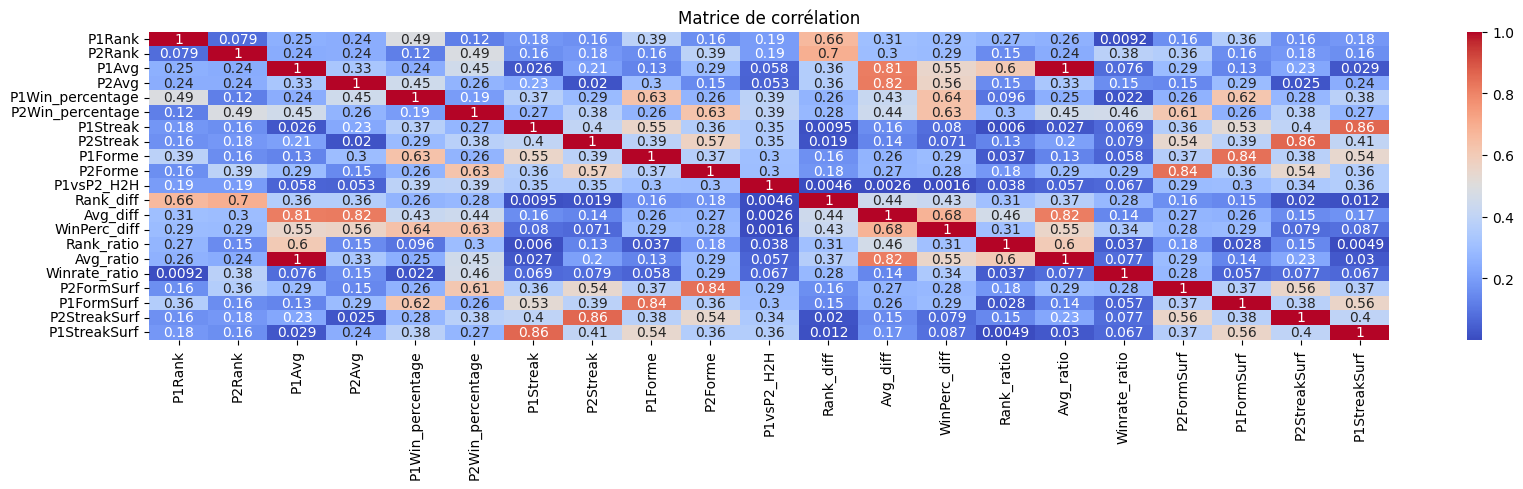

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df_features est ton X
corr_matrix = df_process[num_features].corr().abs()

plt.figure(figsize=(20, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [21]:
df_process.drop(columns=["P1Rank", "P2Rank", "P1Avg", "P2Avg", "P1Win_percentage", "P2Win_percentage"],inplace=True)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

#df_grouped.dropna(inplace=True)

df_train=df_process[df_process.Date.dt.year<2017].copy()
df_test=df_process[df_process.Date.dt.year>=2017].copy()

df_train.drop(["Date"],axis=1,inplace=True)
df_test.drop(["Date"],axis=1,inplace=True)

x_train,y_train = df_train.drop(["Winner"],axis=1),df_train["Winner"],
x_test,y_test = df_test.drop(["Winner"],axis=1),df_test["Winner"]

model = model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.7419661532610763
[[1993  692]
 [ 665 1909]]


In [23]:
importances = model.feature_importances_
features = x_train.columns
pd.DataFrame({'Feature':features, 'Importance':importances}).sort_values('Importance', ascending=False)

,Feature,Importance
21,Avg_ratio,0.151295
20,Avg_diff,0.143570
19,Rank_ratio,0.114956
22,WinPerc_diff,0.108626
18,Rank_diff,0.099470
23,Winrate_ratio,0.045354
7,Loser_Streak,0.034243
6,Winner_Streak,0.029333
16,P2FormSurf,0.028702
15,P1FormSurf,0.027741


In [26]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, threshold="median")
x_train_sel = selector.fit_transform(x_train, y_train)
x_test_sel = selector.transform(x_test)

final_model = RandomForestClassifier()
final_model.fit(x_train_sel, y_train)
y_pred = final_model.predict(x_test_sel)

from sklearn.metrics import accuracy_score
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

✅ Accuracy: 0.7149648222095455


In [52]:
model = RandomForestClassifier(class_weight="balanced")

model = model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.7459593078532041
[[1987  640]
 [ 696 1936]]


### 3. Optimiser le modèle avec gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[100,200,300],
    "max_depth" : [None,5,10],
    "min_samples_split" : [2,4,6],
    "max_features" : ["sqrt","log2"]
}

grid_search = GridSearchCV(RandomForestClassifier(),params,cv=5)

# grid_search.fit(x_train,y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

### 4. XGboost et Gradiant Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

gb = GradientBoostingClassifier()

gb=gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.739113899980985
[[1979  706]
 [ 666 1908]]


In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


c:\Users\Matthieu\Projets Python\Tennis pred\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7588895227229512


In [18]:
xgb = XGBClassifier(
    n_estimators=300,  # Réduire pour éviter le surapprentissage
    max_depth=5,       # Limiter davantage
    learning_rate=0.03,  # Plus conservateur
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,     # Regularisation L1
    reg_lambda=0.1,    # Regularisation L2
    eval_metric='logloss',
    early_stopping_rounds=20,
    use_label_encoder=False
)
xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
y_pred = xgb.predict(x_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

c:\Users\Matthieu\Projets Python\Tennis pred\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


✅ Accuracy: 0.7590796729416239


In [19]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=500, learning_rate=0.05)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Number of positive: 8728, number of negative: 8715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 17443, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500373 -> initscore=0.001491
[LightGBM] [Info] Start training from score 0.001491
LightGBM Accuracy: 0.7647841795018064
